In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

In [3]:
# returns first 5 rows of the dataset
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [4]:
# returns last 5 rows of the dataset
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


In [35]:
# Data cleaning-opposition name says 'v Aus' etc,we can remove 'v' - removing all the 'v' from opposition column
df['opposition'] = df['opposition'].apply(lambda x:x[2:])
df['opposition'].head()

0    ngladesh
1    ngladesh
2    ngladesh
3      kistan
4      kistan
Name: opposition, dtype: object

In [6]:
df['opposition'] = df['opposition'].str.replace('v','',regex=False)
df['opposition']

0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['date']

0     2004-12-23
1     2004-12-26
2     2004-12-27
3     2005-04-02
4     2005-04-05
         ...    
345   2019-06-27
346   2019-06-30
347   2019-07-02
348   2019-07-06
349   2019-07-09
Name: date, Length: 350, dtype: datetime64[ns]

In [8]:
df['year']=df['date'].dt.year

In [9]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [10]:
# In score colmn we have '*' at end of not out score, so extracting those and creating a new column not_out where not_out = 1; out = 0
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

In [11]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [12]:
df.drop(columns='odi_number', inplace=True)

In [13]:
# remove records where TDNB/ DNB (Team did not bat, Did not bat)
df_new = df.loc[((df['score']!= 'DNB') & (df['score']!= 'TDNB')), 'runs_scored':]

In [14]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [15]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [16]:
# Carrer statistics
first_match_date = df['date'].dt.date.min().strftime('%B %d %Y')
first_match_date

'December 23 2004'

In [17]:
last_match_date = df['date'].dt.date.max().strftime('%B %d %Y')
last_match_date

'July 09 2019'

In [18]:
number_of_matches = df.shape[0]
number_of_matches

350

In [19]:
number_of_inns = df_new.shape[0]
number_of_inns

297

In [20]:
not_outs = df_new['not_out'].sum()
not_outs

84

In [21]:
runs_scored = df_new['runs_scored'].sum()
runs_scored

10773

In [23]:
career_avg = (runs_scored/(number_of_inns-not_outs))
career_avg

50.57746478873239

In [24]:
hundreds = (df_new['runs_scored']>=100).sum()
hundreds

10

In [25]:
fifties = ((df_new['runs_scored']>=50)&(df_new['runs_scored']<100)).sum()
fifties

73

In [26]:
fours = df_new['fours'].sum()
fours

826

In [27]:
sixes = df_new['sixes'].sum()
sixes

229

In [29]:
#career_sr = (runs_scored/balls_faced)*100
#career_sr

In [30]:
opposition_counts = df['opposition'].value_counts()
opposition_counts

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64

<Axes: title={'center': 'Number of matches against different oppositions'}, xlabel='opposition'>

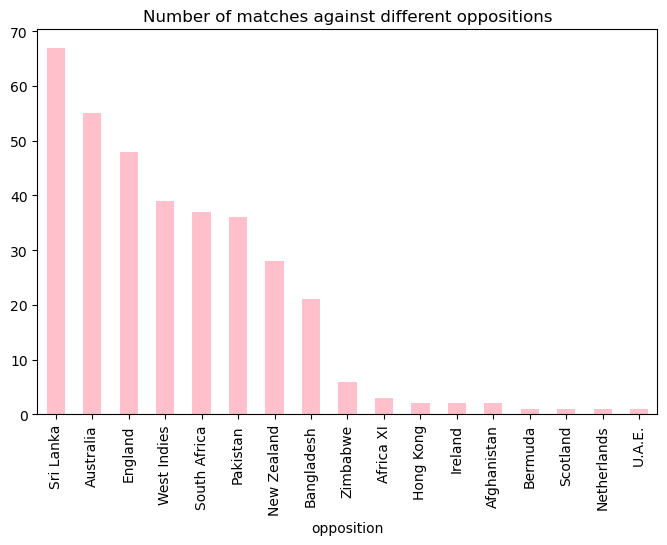

In [34]:
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar',title='Number of matches against different oppositions',figsize=(8,5), color='pink')


In [36]:
grouped_by_opposition = df_new.groupby('opposition')
sums_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
sums_of_runs_scored

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32

In [37]:
runs_scored_by_opposition = pd.DataFrame(sums_of_runs_scored).reset_index()

<Axes: title={'center': 'Runs scored against different opposition'}, xlabel='opposition'>

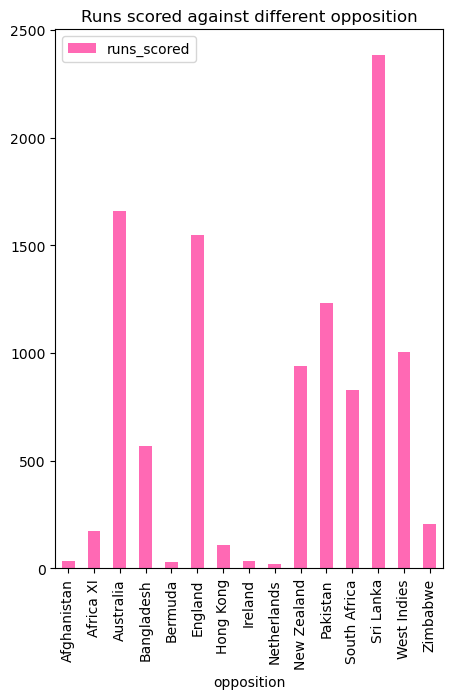

In [40]:
runs_scored_by_opposition.plot(x='opposition',kind='bar',title='Runs scored against different opposition',figsize=(5, 7), color='hotpink')